In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

**Newspaper Data**

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving NewspaperData.csv to NewspaperData.csv


In [ ]:
news=pd.read_csv('NewspaperData.csv')

In [ ]:
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


**Correlation**

In [ ]:
news.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


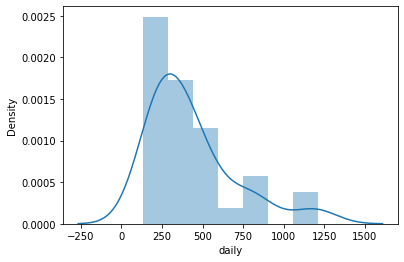

In [ ]:
sns.distplot(news['daily'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


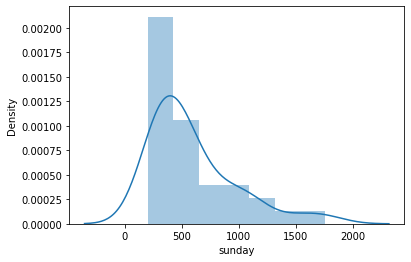

In [ ]:
sns.distplot(news['sunday'])

Fitting a linear regression model

ols-ordinary least square

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=news).fit()

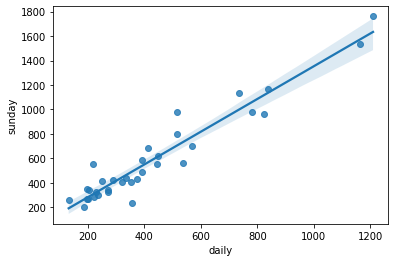

In [ ]:
sns.regplot(x="daily",y="sunday",data=news);

In [ ]:
model.params #coeficients (y intercept, slope)

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
(1.3*1100)+13.835630

1443.83563

In [ ]:
print(model.tvalues, '\n', model.pvalues)


Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

Predict for new data points

In [ ]:
newdata=pd.Series([200,300])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

**Waist circumference-Adipose Tissue**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving WC_AT.csv to WC_AT.csv


In [ ]:
df=pd.read_csv('WC_AT.csv')

In [ ]:
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [ ]:
df.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


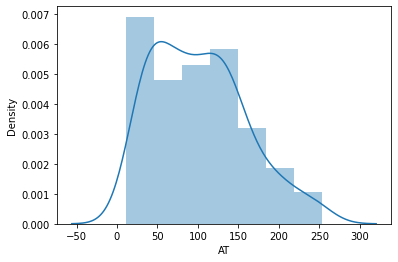

In [ ]:
sns.distplot(df['AT'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


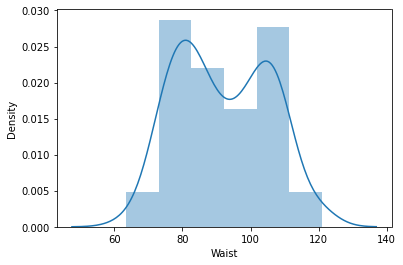

In [ ]:
sns.distplot(df['Waist'])

In [ ]:
import statsmodels.formula.api as smf
wc_model=smf.ols("AT~Waist",data=df).fit()

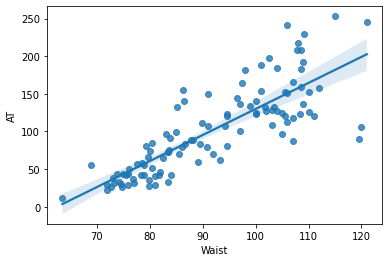

In [ ]:
sns.regplot(x="Waist",y="AT",data=df);

In [ ]:
wc_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
new_waist=pd.Series([48,78,80,103,105])

In [ ]:
AT_pred=pd.DataFrame(new_waist,columns=['Waist'])

In [ ]:
wc_model.predict(AT_pred)

0    -49.956237
1     53.809545
2     60.727263
3    140.281029
4    147.198748
dtype: float64

In [ ]:
wc_model.rsquared

0.670036893052843

In [ ]:
df.min()

Waist    63.50
AT       11.44
dtype: float64

In [ ]:
df.max()

Waist    121.0
AT       253.0
dtype: float64

**Boston house pricing dataset**